In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from operator import itemgetter

p = 10
f = 3
sf = 1
r = 5

# p = int(input("Number of demand points:"))
# f = int(input("Number of candidate sites:"))
# sf = int(input("Number of selected candidate sites:"))
# r = int(input("Radius to cover:"))

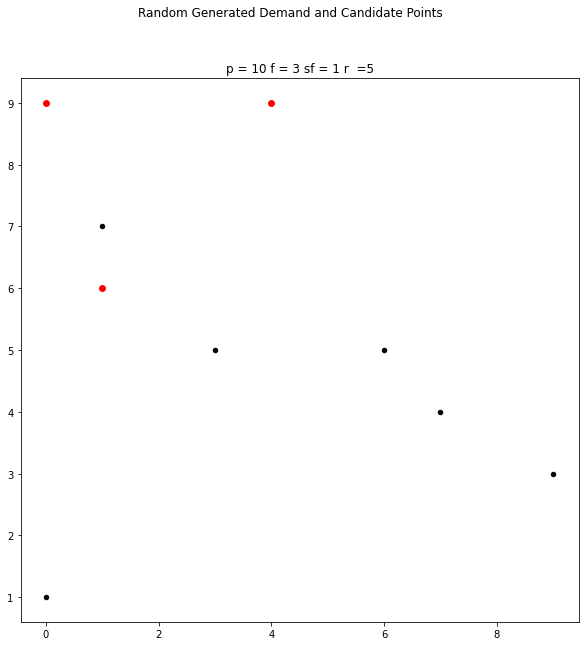

Distance between [0, 9] and [3, 5] is 5.0
Distance between [0, 9] and [7, 4] is 8.602325267042627
Distance between [0, 9] and [4, 9] is 4.0
Distance between [0, 9] and [9, 3] is 10.816653826391969
Distance between [0, 9] and [1, 7] is 2.23606797749979
Distance between [0, 9] and [0, 1] is 8.0
Distance between [0, 9] and [6, 5] is 7.211102550927978
Distance between [1, 6] and [3, 5] is 2.23606797749979
Distance between [1, 6] and [7, 4] is 6.324555320336759
Distance between [1, 6] and [4, 9] is 4.242640687119285
Distance between [1, 6] and [9, 3] is 8.54400374531753
Distance between [1, 6] and [1, 7] is 1.0
Distance between [1, 6] and [0, 1] is 5.0990195135927845
Distance between [1, 6] and [6, 5] is 5.0990195135927845
Distance between [4, 9] and [3, 5] is 4.123105625617661
Distance between [4, 9] and [7, 4] is 5.830951894845301
Distance between [4, 9] and [4, 9] is 0.0
Distance between [4, 9] and [9, 3] is 7.810249675906654
Distance between [4, 9] and [1, 7] is 3.605551275463989
Distan

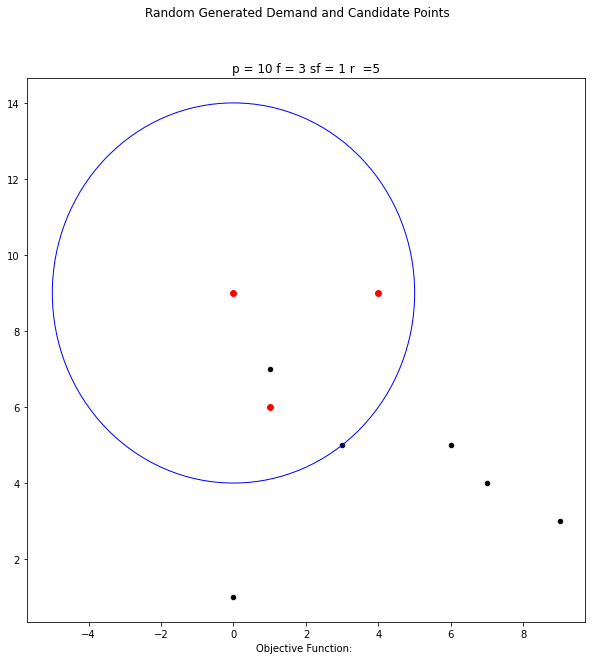

In [6]:
# Generate Demand points
d_points = np.random.randint(low=0, high=p, size=(p - f, 2))

# Generate candidate sites
cs_points = np.random.randint(low=0, high=p, size=(f, 2))

title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)
fig = plt.figure(figsize=(10,10))
plt.title(title)
plt.suptitle('Random Generated Demand and Candidate Points')
if p >= 100:
    ms = 1
else:
    ms = 20
plt.scatter(d_points[:, 0], d_points[:, 1], c='black', s=ms)
plt.scatter(cs_points[:, 0], cs_points[:, 1], c='red', s=ms + 15)
plt.savefig("firstg.jpg")
plt.show()

# Declare the covered points
covered = []
in_range = []

# Calculate distances between candidate sites and demand points
for candidate in cs_points:
    for demand in d_points:
        d = sqrt((demand[0] - candidate[0]) ** 2 + (candidate[1] - demand[1]) ** 2)
        print("Distance between", list(candidate), "and", list(demand), "is", d)
        if d <= r:
            if len(in_range) == 0:
                in_range.append([list(candidate), list(demand)])
            elif demand not in np.array(in_range)[:, 1]:
                in_range.append([list(candidate), list(demand)])
        elif d > r and [demand[0],demand[1]] not in covered:
            covered.append(list(demand))

print("Covered points", in_range)

selected = []
for candidate in cs_points:
    y = np.array(in_range)[:, 0].tolist()
    selected.append([candidate.tolist(), y.count(candidate.tolist())])
    selected.sort(key=itemgetter(1), reverse=True)

graphed_selected = []
for x in range(len(selected)-1):
    if x < sf:
        graphed_selected.append(selected[x])

print(graphed_selected)
of = 0

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
plt.title(title)
plt.suptitle('Random Generated Demand and Candidate Points')
plt.scatter(d_points[:, 0], d_points[:, 1], c='black', s=ms)
plt.scatter(cs_points[:, 0], cs_points[:, 1], c='red', s=ms + 15)
for i in range(len(graphed_selected)):
    circle = plt.Circle((graphed_selected[i][0][0], graphed_selected[i][0][1]), r, color='blue', fill=False)
    of += graphed_selected[i][1]
    ax.add_patch(circle)
plt.xlabel('Objective Function: ' + str(of))
plt.savefig("secondg.jpg")
plt.show()